In [1]:
%matplotlib inline
%time from hikyuu.interactive.interactive import *

from pylab import plot

Wall time: 11.9 s


# 示例：通道突破系统

当价格突破20日高点时买入，当价格低于10日低点时卖出。

In [2]:
#创建一个从2001年1月1日开始的账户，初始资金20万元
my_tm = crtTM(Datetime(200101010000), 200000)

In [3]:
my_sys = SYS_Simple(tm=my_tm)

In [4]:
def TurtleSG(self):
     n1 = self.getParam("n1")
     n2 = self.getParam("n2")
     k = self.getTO()
     c = CLOSE(k)
     h = REF(HHV(c, n1), 1) #前n日高点
     L = REF(LLV(c, n2), 1) #前n日低点
     for i in range(h.discard, len(k)):
         if (c[i] >= h[i]):
             self._addBuySignal(k[i].datetime)
         elif (c[i] <= L[i]):
             self._addSellSignal(k[i].datetime)

In [5]:
my_sg = crtSG(TurtleSG, {'n1': 20, 'n2': 10}, 'TurtleSG')

my_mm = MM_FixedCount(1000)

s = sm['sz000001']
query = QueryByDate(Datetime(200101010000), Datetime(201705010000))

my_sys.mm = my_mm
my_sys.sg = my_sg
my_sys.run(s, query)

In [6]:
calendar = sm.getTradingCalendar(query, 'SZ')
calendar

In [7]:
x1 = my_tm.getFundsCurve(calendar, Query.DAY)

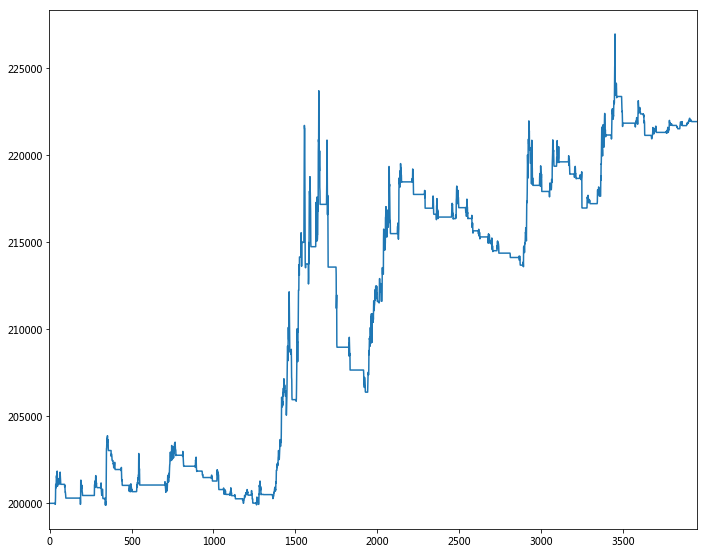

In [8]:
PRICELIST(x1).plot()

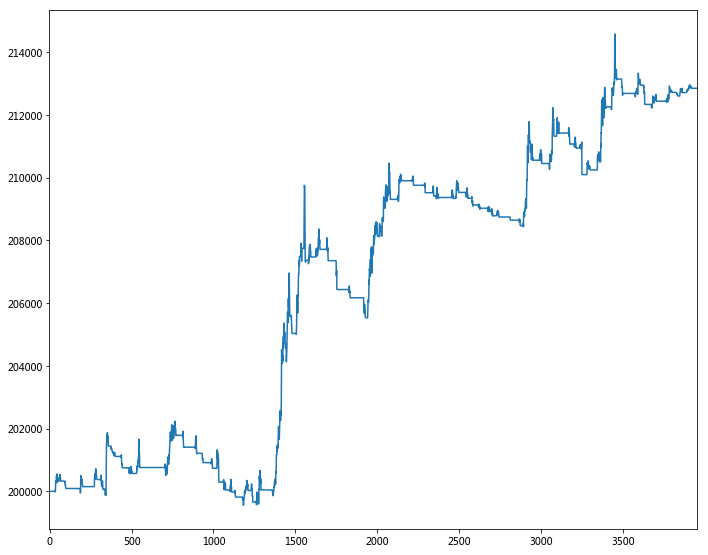

In [9]:
my_sys.mm = MM_FixedPercent(0.03)
my_sys.run(s, query)

x2 = my_tm.getFundsCurve(calendar, Query.DAY)
PRICELIST(x2).plot()

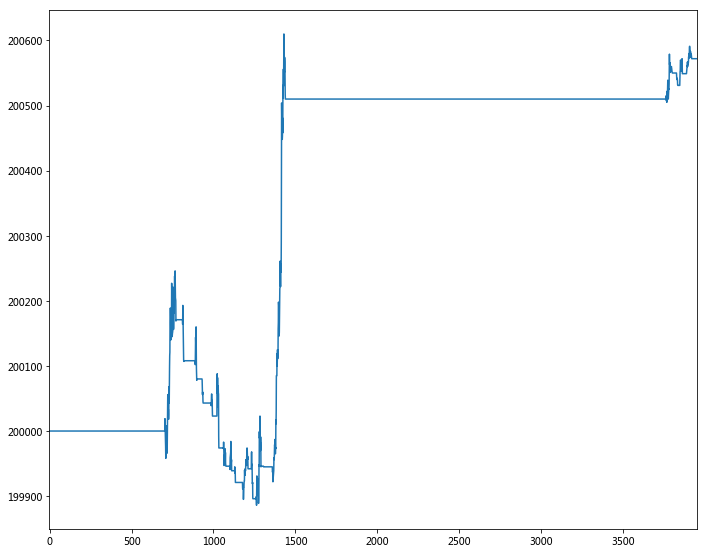

In [10]:
my_sys.mm = MM_FixedRisk(1000)
my_sys.run(s, query)

x3 = my_tm.getFundsCurve(calendar, Query.DAY)
PRICELIST(x3).plot()

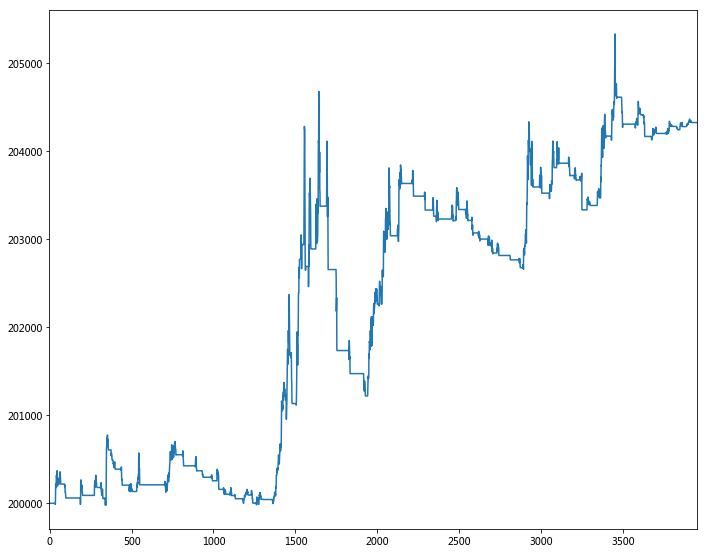

In [11]:
my_sys.mm = MM_FixedCapital(1000)
my_sys.run(s, query)

x4 = my_tm.getFundsCurve(calendar, Query.DAY)
PRICELIST(x4).plot()

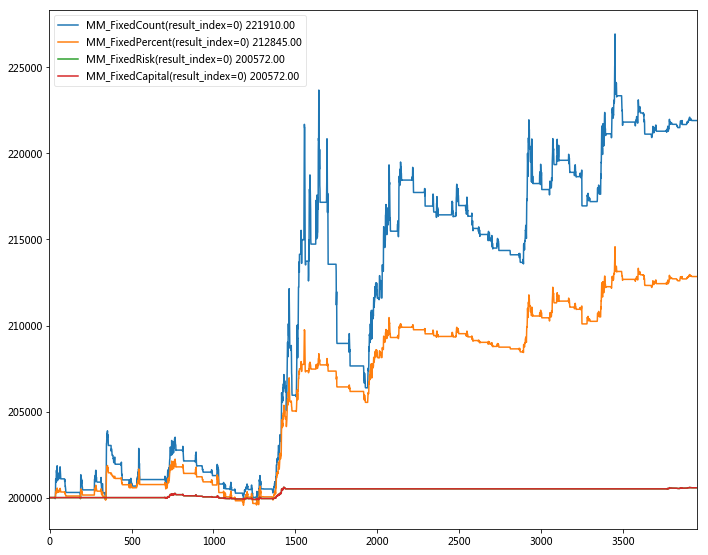

In [12]:
ax = create_figure(1)

def x_plot(x, name, ax):
    px = PRICELIST(x)
    px.name = name
    px.plot(axes=ax, legend_on=True)

x_plot(x1, 'MM_FixedCount', ax)
x_plot(x2, 'MM_FixedPercent', ax)
x_plot(x3, 'MM_FixedRisk', ax)
x_plot(x3, 'MM_FixedCapital', ax)